In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import pylab as pl
import urllib
import os
import sys
import requests
import json
import io
from shapely.geometry import Point

%matplotlib inline

In [2]:
#urllib.request.urlretrieve('https://data.cityofnewyork.us/Housing-Development/Public-Use-Microdata-Areas-PUMA-/cwiz-gcty/data', "file.zip")

In [3]:
os.getenv("PUIDATA")

'/home/cusp/vmr286/PUIdata'

In [4]:
filename = os.getenv('PUIDATA') + '/PUMA'

cens_key = open(os.getenv('PUIDATA')+'/census_key.txt', 'r+')
myAPI = cens_key.readlines()[0]


In [5]:
pumashp = gpd.GeoDataFrame.from_file(filename)

In [6]:
pumashp.crs

{'init': 'epsg:4326'}

In [7]:
pumashp.head()

,shape_area,shape_leng,puma,geometry
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...


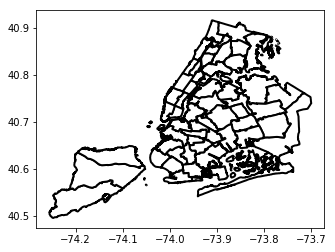

In [8]:
pumashp.plot(color="white", edgecolor="black", lw=2);

In [9]:
#import myAPI

In [10]:
#myAPI = myAPI.get_key()

In [11]:
#myAPI = myAPI[:-1]

In [12]:
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [13]:
affkeys = np.array(list(aff1y['variables'].keys()))


In [14]:
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type')]

In [15]:
keyNhouseholds = 'B28002_001E'

In [16]:
keyNBB = 'B28002_004E'

In [17]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [18]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [19]:
pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [20]:
pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [21]:
pumaBB['B28002_001E'] = pumaPP['B28002_001E']
pumaBB['pcBB'] = pumaBB.B28002_004E / pumaBB.B28002_001E * 100

In [22]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50.csv",
                   usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])

OSError: File b'/home/cusp/vmr286/PUIdata/ACS_16_1YR_GCT2801.ST50.csv' does not exist

### Comment: This data has to be reproducible.

In [23]:
bbpc.head()

NameError: name 'bbpc' is not defined

In [24]:
bbpc = bbpc.drop(bbpc.index[0])

NameError: name 'bbpc' is not defined

In [25]:
bbpc['gid'] = bbpc['GCT_STUB.target-geo-id2'] - 3600000

NameError: name 'bbpc' is not defined

In [26]:
pumashp.puma = pumashp.puma.astype(int)

In [27]:
diff_ = pumaBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["state", "gid", "pcBB", "HC01"]]

diff_["diff"] = np.abs(diff_["pcBB"] - diff_["HC01"].astype(float))

diff_.describe()

NameError: name 'bbpc' is not defined

In [28]:
pumashp = pumashp.merge(diff_, left_on='puma', right_on='gid')

NameError: name 'diff_' is not defined

In [29]:
pumashp.plot(column='diff', cmap='viridis')

KeyError: 'diff'

In [30]:
linkNYC = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW9_fb55/linkNYClocations.csv")

In [31]:
linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [32]:
geometry = [Point(xy) for xy in zip(linkNYC.longitude, linkNYC.latitude)]

In [33]:
linkNYC = linkNYC.drop(['longitude','latitude'], axis= 1)

In [34]:
linkNYC = GeoDataFrame(linkNYC, geometry=geometry)

In [35]:
linkNYC.crs = {'init': 'epsg:4326'}

In [36]:



linkNYC.head()

,Unnamed: 0,link_site,date_link_,geometry
0,0,bk-01-138951,2017-07-01,POINT (-73.94248859 40.70166753)
1,1,bk-01-109091,2017-07-01,POINT (-73.9421692831 40.7015421938)
2,2,bk-01-143982,2017-07-01,POINT (-73.94223923850001 40.7019303439)
3,3,bk-01-109262,2017-04-28,POINT (-73.94291758 40.70506042)
4,4,bk-01-125268,2017-03-31,POINT (-73.953439 40.728133)


In [37]:
linkNYC.date_link_ = pd.to_datetime(linkNYC.date_link_)

In [38]:
linkNYC['age'] = pd.datetime.now().date() - linkNYC.date_link_

In [39]:
linkNYC.age.dtype

dtype('<m8[ns]')

In [40]:
base = pumashp.plot(column='pcBB', cmap='Blues', scheme='equal_interval', k=5, figsize=(16, 16), legend=True)
linkNYC.plot(cmap='OrRd', ax=base)

KeyError: 'pcBB'

## This map shows the locations of linknycs across NYC and the bins represent the percent of the population with broadband access.

In [41]:
keyPop = 'B00001_001E'

url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyPop +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaPop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [42]:
pumashp = pumashp.merge(pumaPop, left_on='puma', right_on='public use microdata area')

In [43]:
pumashp.head()

,shape_area,shape_leng,puma,geometry,B00001_001E,NAME,state,public use microdata area,Unnamed: 4
0,9.792852e+07,53227.144357,3701,POLYGON ((-73.89641133483133 40.90450452082026...,1517,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN
1,1.889860e+08,106050.002507,3702,POLYGON ((-73.86477258283533 40.90201244187379...,1959,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN
2,2.670137e+08,304070.209400,3703,(POLYGON ((-73.78833349834532 40.8346671297593...,1305,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN
3,1.062129e+08,47970.901277,3704,"POLYGON ((-73.84792614069238 40.8713422330779,...",1882,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN
4,1.224950e+08,68630.512052,3705,POLYGON ((-73.88753429505171 40.82250933946978...,2011,"NYC-Bronx Community District 3 & 6--Belmont, C...",36,3705,NaN


In [44]:
#pumashp = pumashp.drop(['public use microdata area', 'HC01','gid'], axis=1)

In [45]:
pumashp = pumashp.to_crs(epsg='2263')

In [46]:
linkNYC = linkNYC.to_crs(epsg='2263')

In [47]:
linkpp = gpd.sjoin(linkNYC, pumashp, how='inner').groupby('puma')[['link_site']].count()


In [48]:
linkpp=linkpp.reset_index()

In [49]:
linkpp.shape

(37, 2)

In [50]:
pumashp = pumashp.merge(linkpp, how='left', left_on='puma', right_on='puma')

In [51]:
pumashp['link_per_100'] = ( 100 * pumashp.link_site) / pumashp.B00001_001E 

In [52]:
pumashp.link_per_100.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    37.000000
mean      2.327677
std       3.328955
min       0.049727
25%            NaN
50%            NaN
75%            NaN
max      15.141540
Name: link_per_100, dtype: float64

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


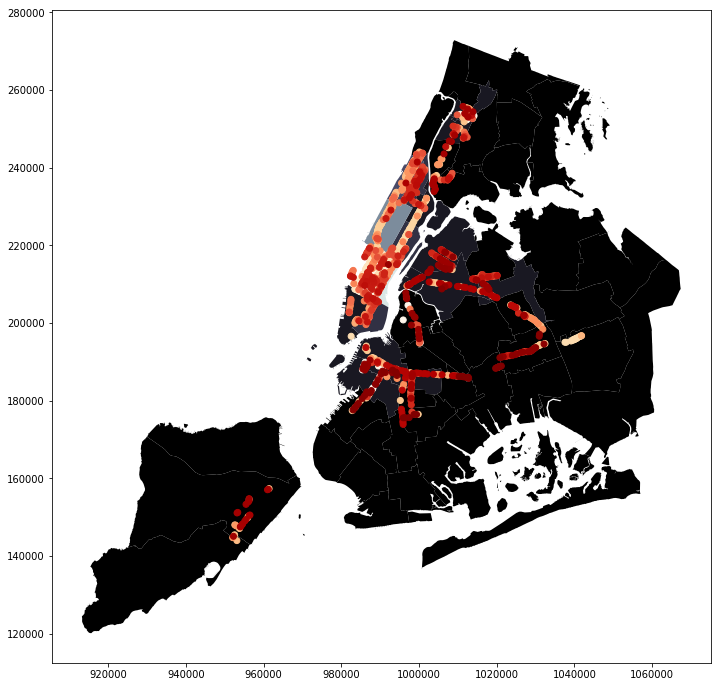

In [53]:
base = pumashp.plot(column='link_per_100', cmap='bone',
                                      scheme='equal_interval', k=10, figsize=(12,12))

linkNYC.plot(ax=base, cmap='OrRd')

## This map shows the number of link stations per 100 people. From the map it looks like many areas do receive access to these stations

Grade: 8/10